In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Chargement et Decouverte des datasets

In [ ]:
sensor_df = pd.read_csv('pai_sensor_table.csv')
machine_spec = pd.read_csv('pai_machine_spec.csv')
task_df = pd.read_csv('pai_task_table.csv')


print(f"Sensor data: {sensor_df.shape}")
print(f"Machine specs: {machine_spec.shape}")
print(f"Tasks: {task_df.shape}")

Sensor data: (177936, 16)
Machine specs: (1897, 5)
Tasks: (349570, 10)


In [ ]:
#aperçu datasets
print(f" Sensor: {sensor_df.info()}")

print(f"Machine spec: {machine_spec.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177936 entries, 0 to 177935
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   job_name         177936 non-null  object 
 1   task_name        177935 non-null  object 
 2   worker_name      177935 non-null  object 
 3   inst_id          177935 non-null  object 
 4   machine          177935 non-null  object 
 5   gpu_name         177935 non-null  object 
 6   cpu_usage        177626 non-null  float64
 7   gpu_wrk_util     177935 non-null  float64
 8   avg_mem          177875 non-null  float64
 9   max_mem          177935 non-null  float64
 10  avg_gpu_wrk_mem  177935 non-null  float64
 11  max_gpu_wrk_mem  177935 non-null  float64
 12  read             177935 non-null  float64
 13  write            177935 non-null  float64
 14  read_count       177935 non-null  float64
 15  write_count      177935 non-null  float64
dtypes: float64(10), object(6)
memory usage

In [ ]:
machine_spec.head(5)

,machine,gpu_type,cap_cpu,cap_mem,cap_gpu
0,7399a758eb02bae1a3621236,CPU,96,512,0
1,75c536d5ba60528b3ef3ae40,CPU,96,512,0
2,6265a99de1a50cc6f1b03602,CPU,96,512,0
3,cb5c703eae0a123ad25e480d,CPU,96,512,0
4,fc6921f2af20c5337c43d4a9,CPU,96,512,0


In [ ]:
sensor_df.head(5)

,job_name,task_name,worker_name,inst_id,machine,gpu_name,cpu_usage,gpu_wrk_util,avg_mem,max_mem,avg_gpu_wrk_mem,max_gpu_wrk_mem,read,write,read_count,write_count
0,c6acdbd813439f3ca63a9406,worker,d50591d4a39b5a68e7efa15a0b51cfdca03e8f7a49ade7...,dc6e6daefec62bc3729def7e15133c03b82a97a1457d68...,4a57d4f3d41316da3c4ae876,/dev/nvidia5,0.603296,0.000000,0.232509,0.256836,0.000000,0.000000,4.666371e+03,6.608757e+03,50.706367,47.831054
1,c6acdbd813439f3ca63a9406,worker,fd1ee8bacf027604c2afdf89fc4edd843322b78376c9df...,dc6e6daefec62bc3729def7e15133c03b82a97a1457d68...,d84f5bc585e4ac5d24b30ec1,/dev/nvidia7,1.039332,0.000000,0.305684,0.343750,0.000000,0.000000,9.073576e+03,6.643213e+03,80.299497,47.311857
2,c6acdbd813439f3ca63a9406,worker,8885c53fd558926cb6aa44bbb7f40e242093778988c57d...,dc6e6daefec62bc3729def7e15133c03b82a97a1457d68...,b8dca09e0247ec64355414f9,/dev/nvidia2,0.287556,0.000000,0.345654,0.436523,0.000000,0.000000,4.852393e+03,6.681694e+03,50.627430,47.857114
3,3e4e9725920e7dc4a7a4ebdd,worker,8170c081a8d69cc228b9c2fa13a1c5e1190bf215296816...,ccc2b2c5742997e7ed0459efa6ec3db8b8e56e3f7fcd5f...,f7c1c4979c05bb7d20da65e4,/dev/nvidia7,83.771930,18.883333,5.817499,6.886719,2.065153,2.317383,1.504240e+08,5.082606e+07,7119.393443,75116.196721
4,3e4e9725920e7dc4a7a4ebdd,worker,e43f95191455f15365b40289c32b44648ce1e501331119...,ccc2b2c5742997e7ed0459efa6ec3db8b8e56e3f7fcd5f...,142a829a1e344f905fdcce42,/dev/nvidia2,112.711111,27.000000,5.494639,6.951172,2.001526,2.317383,1.854764e+08,6.311824e+07,9050.204082,93378.387755


Infos datasets

In [ ]:
print(sensor_df['cpu_usage'].describe())


count    177626.000000
mean        265.903261
std         635.219228
min           0.000000
25%          54.402571
50%          94.401031
75%         183.346743
max        8890.321362
Name: cpu_usage, dtype: float64


In [ ]:
print(machine_spec['gpu_type'].value_counts())

gpu_type
P100       798
T4         497
MISC       280
V100M32    135
V100       104
CPU         83
Name: count, dtype: int64


verification valeurs nulles

In [ ]:
missing_sensor = sensor_df.isnull().sum()

print("Sensor data:",missing_sensor[missing_sensor > 0])

missing_machine = machine_spec.isnull().sum()

print("Machine specs:",missing_machine[missing_machine > 0])

Sensor data: task_name            1
worker_name          1
inst_id              1
machine              1
gpu_name             1
cpu_usage          310
gpu_wrk_util         1
avg_mem             61
max_mem              1
avg_gpu_wrk_mem      1
max_gpu_wrk_mem      1
read                 1
write                1
read_count           1
write_count          1
dtype: int64
Machine specs: Series([], dtype: int64)


In [ ]:
merged_viz = sensor_df.merge(machine_spec[['machine', 'gpu_type', 'cap_cpu']], on='machine', how='left')
merged_viz.head(10)

,job_name,task_name,worker_name,inst_id,machine,gpu_name,cpu_usage,gpu_wrk_util,avg_mem,max_mem,avg_gpu_wrk_mem,max_gpu_wrk_mem,read,write,read_count,write_count,gpu_type,cap_cpu
0,c6acdbd813439f3ca63a9406,worker,d50591d4a39b5a68e7efa15a0b51cfdca03e8f7a49ade7...,dc6e6daefec62bc3729def7e15133c03b82a97a1457d68...,4a57d4f3d41316da3c4ae876,/dev/nvidia5,0.603296,0.000000,0.232509,0.256836,0.000000,0.000000,4.666371e+03,6.608757e+03,50.706367,47.831054,V100M32,96.0
1,c6acdbd813439f3ca63a9406,worker,fd1ee8bacf027604c2afdf89fc4edd843322b78376c9df...,dc6e6daefec62bc3729def7e15133c03b82a97a1457d68...,d84f5bc585e4ac5d24b30ec1,/dev/nvidia7,1.039332,0.000000,0.305684,0.343750,0.000000,0.000000,9.073576e+03,6.643213e+03,80.299497,47.311857,V100M32,96.0
2,c6acdbd813439f3ca63a9406,worker,8885c53fd558926cb6aa44bbb7f40e242093778988c57d...,dc6e6daefec62bc3729def7e15133c03b82a97a1457d68...,b8dca09e0247ec64355414f9,/dev/nvidia2,0.287556,0.000000,0.345654,0.436523,0.000000,0.000000,4.852393e+03,6.681694e+03,50.627430,47.857114,V100M32,96.0
3,3e4e9725920e7dc4a7a4ebdd,worker,8170c081a8d69cc228b9c2fa13a1c5e1190bf215296816...,ccc2b2c5742997e7ed0459efa6ec3db8b8e56e3f7fcd5f...,f7c1c4979c05bb7d20da65e4,/dev/nvidia7,83.771930,18.883333,5.817499,6.886719,2.065153,2.317383,1.504240e+08,5.082606e+07,7119.393443,75116.196721,MISC,96.0
4,3e4e9725920e7dc4a7a4ebdd,worker,e43f95191455f15365b40289c32b44648ce1e501331119...,ccc2b2c5742997e7ed0459efa6ec3db8b8e56e3f7fcd5f...,142a829a1e344f905fdcce42,/dev/nvidia2,112.711111,27.000000,5.494639,6.951172,2.001526,2.317383,1.854764e+08,6.311824e+07,9050.204082,93378.387755,MISC,96.0
5,3e4e9725920e7dc4a7a4ebdd,worker,8fa54171acbc9f16704c03f137ac053ede9a97432cfc94...,ccc2b2c5742997e7ed0459efa6ec3db8b8e56e3f7fcd5f...,5248e29b2b7f2b5f8b974608,/dev/nvidia2,108.769231,29.166667,5.652701,6.937500,1.963844,2.317383,2.091777e+08,7.192911e+07,9510.627907,107039.302326,MISC,96.0
6,3e4e9725920e7dc4a7a4ebdd,worker,8b5deb38cfee0d25978953eff78d285adcddccdb896350...,ccc2b2c5742997e7ed0459efa6ec3db8b8e56e3f7fcd5f...,330af596a5c0d344d34d8c21,/dev/nvidia6,115.660377,24.363636,5.851870,6.920898,2.034766,2.313477,9.828654e+07,4.679444e+07,5033.017857,41641.571429,MISC,96.0
7,3e4e9725920e7dc4a7a4ebdd,worker,5cc12ab8942150b8287b6b18cb22a0a155ef477057fe57...,ccc2b2c5742997e7ed0459efa6ec3db8b8e56e3f7fcd5f...,bcbdc8d0153f492b26416fca,/dev/nvidia5,116.170213,16.600000,5.861169,6.875000,2.006895,2.313477,9.606740e+07,3.991666e+07,4455.411765,44904.235294,MISC,96.0
8,3e4e9725920e7dc4a7a4ebdd,worker,0db3ce65882d5deb4b7ad81cd25acf8877fd7bb177e3fa...,ccc2b2c5742997e7ed0459efa6ec3db8b8e56e3f7fcd5f...,7eb408711a8ba74d5d12ed08,/dev/nvidia5,110.404762,26.000000,5.693004,6.922852,1.995703,2.317383,1.079601e+08,4.425645e+07,4968.260870,49728.239130,MISC,96.0
9,3e4e9725920e7dc4a7a4ebdd,worker,41079e99d092f88c2251335a707c13884737c5046f1bf4...,ccc2b2c5742997e7ed0459efa6ec3db8b8e56e3f7fcd5f...,4f4065b8553a0bd900f133db,/dev/nvidia4,111.431373,18.222222,5.820976,6.975586,2.029604,2.313477,1.741845e+08,6.295190e+07,7542.436364,83757.781818,MISC,96.0


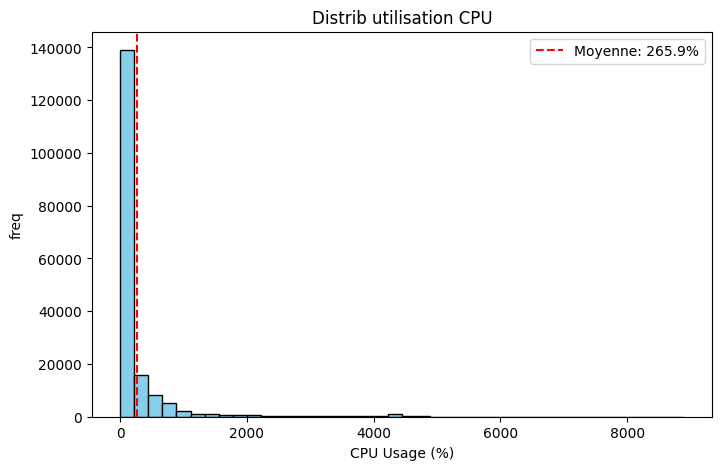

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(sensor_df['cpu_usage'].dropna(), bins=40, color='skyblue', edgecolor='black')
plt.axvline(sensor_df['cpu_usage'].mean(), color='red', linestyle='--', label=f"Moyenne: {sensor_df['cpu_usage'].mean():.1f}%")
plt.title("Distrib utilisation CPU")
plt.xlabel("CPU Usage (%)")
plt.ylabel("freq")
plt.legend()
plt.show()

/tmp/ipython-input-3294557045.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gpu_type', y='cpu_usage', data=merged_viz, palette='pastel')


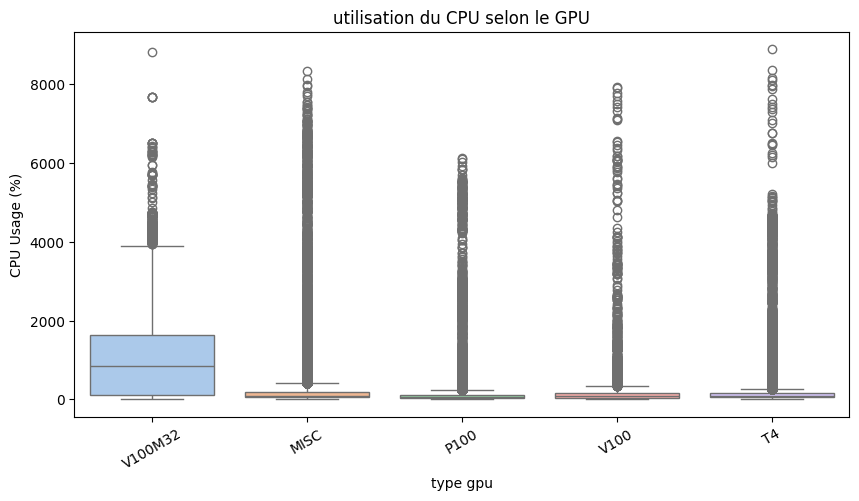

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='gpu_type', y='cpu_usage', data=merged_viz, palette='pastel')
plt.title("utilisation du CPU selon le GPU")
plt.xlabel("type gpu")
plt.ylabel("CPU Usage (%)")
plt.xticks(rotation=30)
plt.show()

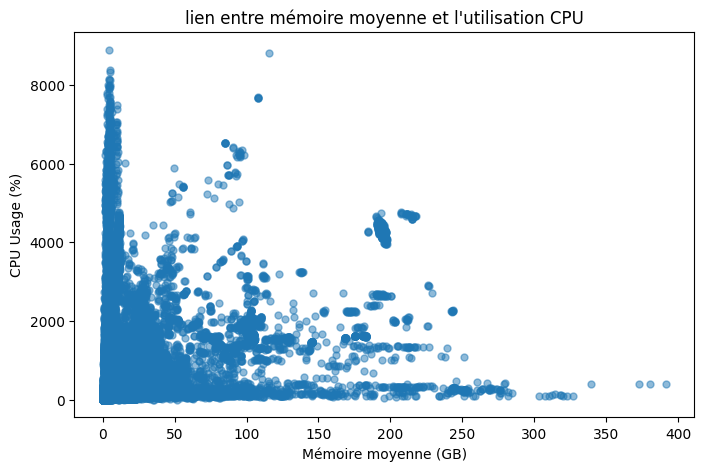

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(sensor_df['avg_mem'], sensor_df['cpu_usage'], alpha=0.5, s=25)
plt.title("lien entre mémoire moyenne et l'utilisation CPU")
plt.xlabel("Mémoire moyenne (GB)")
plt.ylabel("CPU Usage (%)")
plt.show()

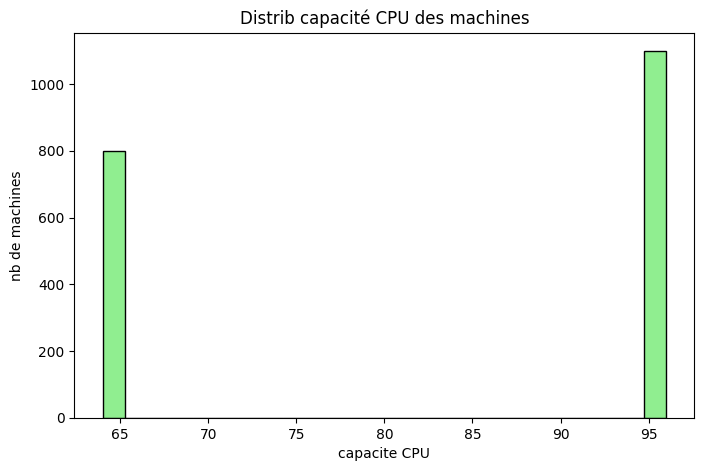

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(machine_spec['cap_cpu'].dropna(), bins=25, color='lightgreen', edgecolor='black')
plt.title("Distrib capacité CPU des machines")
plt.xlabel("capacite CPU")
plt.ylabel("nb de machines")
plt.show()

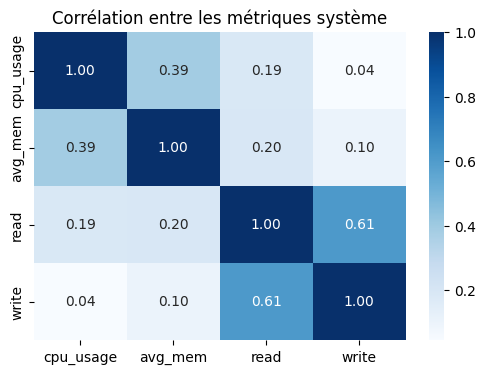

In [ ]:
plt.figure(figsize=(6, 4))
corr = sensor_df[['cpu_usage', 'avg_mem', 'read', 'write']].corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title("Corrélation entre les métriques système")
plt.show()

In [ ]:
df = sensor_df.merge(machine_spec, on='machine', how='left')

print(f"   Avant: {df.shape[0]} lignes")
df_clean = df.dropna(subset=['cpu_usage'])
print(f"   Après suppression lignes sans CPU: {df_clean.shape[0]} lignes")
print(f"   → {df.shape[0] - df_clean.shape[0]} lignes supprimées")


   Avant: 177936 lignes
   Après suppression lignes sans CPU: 177626 lignes
   → 310 lignes supprimées


In [ ]:
#name gpu
_gpu = LabelEncoder()
df_clean['gpu_name_encoded'] = _gpu.fit_transform(
    df_clean['gpu_name'].fillna('none')
)
print(f"gpu_name encodé ({len(_gpu.classes_)} catégories)")
print(f"gpu_name catégories {_gpu.classes_}")


gpu_name encodé (8 catégories)
gpu_name catégories ['/dev/nvidia0' '/dev/nvidia1' '/dev/nvidia2' '/dev/nvidia3'
 '/dev/nvidia4' '/dev/nvidia5' '/dev/nvidia6' '/dev/nvidia7']


/tmp/ipython-input-2854560042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['gpu_name_encoded'] = _gpu.fit_transform(


In [ ]:
#type gpu
_gpu_type = LabelEncoder()
df_clean['gpu_type_encoded'] = _gpu_type.fit_transform(
    df_clean['gpu_type'].fillna('CPU')
)
print(f"gpu_type encodé ({len(_gpu_type.classes_)} catégories)")
print(f"gpu_name catégories {_gpu_type.classes_}")

gpu_type encodé (6 catégories)
gpu_name catégories ['CPU' 'MISC' 'P100' 'T4' 'V100' 'V100M32']


/tmp/ipython-input-2424482436.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['gpu_type_encoded'] = _gpu_type.fit_transform(


In [ ]:
_machine = LabelEncoder()
df_clean['machine_encoded'] = _machine.fit_transform(df_clean['machine'])
print(f"machine encodé ({len(_machine.classes_)} machines)")

machine encodé (1677 machines)


/tmp/ipython-input-537772667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['machine_encoded'] = _machine.fit_transform(df_clean['machine'])


In [ ]:
cols_with_missing = df_clean.columns[df_clean.isnull().any()].tolist()
print(f"Colonnes concernées: {cols_with_missing}")

Colonnes concernées: ['gpu_type', 'cap_cpu', 'cap_mem', 'cap_gpu']


In [ ]:
# Pour les métriques GPU, 0 signifie que c'est pas utilisé
gpu_cols = ['gpu_wrk_util', 'avg_gpu_wrk_mem', 'max_gpu_wrk_mem']
for col in gpu_cols:
    if col in df_clean.columns:
        df_clean[col].fillna(0, inplace=True)

df_clean.info()
df_clean.shape
df_clean.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 177626 entries, 0 to 177934
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   job_name          177626 non-null  object 
 1   task_name         177626 non-null  object 
 2   worker_name       177626 non-null  object 
 3   inst_id           177626 non-null  object 
 4   machine           177626 non-null  object 
 5   gpu_name          177626 non-null  object 
 6   cpu_usage         177626 non-null  float64
 7   gpu_wrk_util      177626 non-null  float64
 8   avg_mem           177626 non-null  float64
 9   max_mem           177626 non-null  float64
 10  avg_gpu_wrk_mem   177626 non-null  float64
 11  max_gpu_wrk_mem   177626 non-null  float64
 12  read              177626 non-null  float64
 13  write             177626 non-null  float64
 14  read_count        177626 non-null  float64
 15  write_count       177626 non-null  float64
 16  gpu_type          177623 

/tmp/ipython-input-3294001825.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(0, inplace=True)
/tmp/ipython-input-3294001825.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col].fillna(0, inplace=True)


,job_name,task_name,worker_name,inst_id,machine,gpu_name,cpu_usage,gpu_wrk_util,avg_mem,max_mem,...,write,read_count,write_count,gpu_type,cap_cpu,cap_mem,cap_gpu,gpu_name_encoded,gpu_type_encoded,machine_encoded
0,c6acdbd813439f3ca63a9406,worker,d50591d4a39b5a68e7efa15a0b51cfdca03e8f7a49ade7...,dc6e6daefec62bc3729def7e15133c03b82a97a1457d68...,4a57d4f3d41316da3c4ae876,/dev/nvidia5,0.603296,0.000000,0.232509,0.256836,...,6.608757e+03,50.706367,47.831054,V100M32,96.0,384.0,8.0,5,5,524
1,c6acdbd813439f3ca63a9406,worker,fd1ee8bacf027604c2afdf89fc4edd843322b78376c9df...,dc6e6daefec62bc3729def7e15133c03b82a97a1457d68...,d84f5bc585e4ac5d24b30ec1,/dev/nvidia7,1.039332,0.000000,0.305684,0.343750,...,6.643213e+03,80.299497,47.311857,V100M32,96.0,384.0,8.0,7,5,1416
2,c6acdbd813439f3ca63a9406,worker,8885c53fd558926cb6aa44bbb7f40e242093778988c57d...,dc6e6daefec62bc3729def7e15133c03b82a97a1457d68...,b8dca09e0247ec64355414f9,/dev/nvidia2,0.287556,0.000000,0.345654,0.436523,...,6.681694e+03,50.627430,47.857114,V100M32,96.0,384.0,8.0,2,5,1207
3,3e4e9725920e7dc4a7a4ebdd,worker,8170c081a8d69cc228b9c2fa13a1c5e1190bf215296816...,ccc2b2c5742997e7ed0459efa6ec3db8b8e56e3f7fcd5f...,f7c1c4979c05bb7d20da65e4,/dev/nvidia7,83.771930,18.883333,5.817499,6.886719,...,5.082606e+07,7119.393443,75116.196721,MISC,96.0,512.0,8.0,7,1,1629
4,3e4e9725920e7dc4a7a4ebdd,worker,e43f95191455f15365b40289c32b44648ce1e501331119...,ccc2b2c5742997e7ed0459efa6ec3db8b8e56e3f7fcd5f...,142a829a1e344f905fdcce42,/dev/nvidia2,112.711111,27.000000,5.494639,6.951172,...,6.311824e+07,9050.204082,93378.387755,MISC,96.0,512.0,8.0,2,1,134
5,3e4e9725920e7dc4a7a4ebdd,worker,8fa54171acbc9f16704c03f137ac053ede9a97432cfc94...,ccc2b2c5742997e7ed0459efa6ec3db8b8e56e3f7fcd5f...,5248e29b2b7f2b5f8b974608,/dev/nvidia2,108.769231,29.166667,5.652701,6.937500,...,7.192911e+07,9510.627907,107039.302326,MISC,96.0,512.0,8.0,2,1,576
6,3e4e9725920e7dc4a7a4ebdd,worker,8b5deb38cfee0d25978953eff78d285adcddccdb896350...,ccc2b2c5742997e7ed0459efa6ec3db8b8e56e3f7fcd5f...,330af596a5c0d344d34d8c21,/dev/nvidia6,115.660377,24.363636,5.851870,6.920898,...,4.679444e+07,5033.017857,41641.571429,MISC,96.0,512.0,8.0,6,1,347
7,3e4e9725920e7dc4a7a4ebdd,worker,5cc12ab8942150b8287b6b18cb22a0a155ef477057fe57...,ccc2b2c5742997e7ed0459efa6ec3db8b8e56e3f7fcd5f...,bcbdc8d0153f492b26416fca,/dev/nvidia5,116.170213,16.600000,5.861169,6.875000,...,3.991666e+07,4455.411765,44904.235294,MISC,96.0,512.0,8.0,5,1,1233
8,3e4e9725920e7dc4a7a4ebdd,worker,0db3ce65882d5deb4b7ad81cd25acf8877fd7bb177e3fa...,ccc2b2c5742997e7ed0459efa6ec3db8b8e56e3f7fcd5f...,7eb408711a8ba74d5d12ed08,/dev/nvidia5,110.404762,26.000000,5.693004,6.922852,...,4.425645e+07,4968.260870,49728.239130,MISC,96.0,512.0,8.0,5,1,841
9,3e4e9725920e7dc4a7a4ebdd,worker,41079e99d092f88c2251335a707c13884737c5046f1bf4...,ccc2b2c5742997e7ed0459efa6ec3db8b8e56e3f7fcd5f...,4f4065b8553a0bd900f133db,/dev/nvidia4,111.431373,18.222222,5.820976,6.975586,...,6.295190e+07,7542.436364,83757.781818,MISC,96.0,512.0,8.0,4,1,548


In [ ]:
print(df_clean[['cpu_usage', 'avg_mem', 'gpu_wrk_util', 'read', 'write']].describe())

           cpu_usage        avg_mem   gpu_wrk_util          read         write
count  177626.000000  177626.000000  177626.000000  1.776260e+05  1.776260e+05
mean      265.903261       7.437495      18.248321  1.994872e+08  9.977734e+07
std       635.219228      18.957121      68.233918  4.562334e+08  3.921162e+08
min         0.000000       0.002930       0.000000  0.000000e+00  0.000000e+00
25%        54.402571       0.602889       0.000000  1.518657e+07  2.257265e+06
50%        94.401031       2.706518       1.478261  4.050292e+07  1.278329e+07
75%       183.346743       7.559758      10.529709  1.208171e+08  5.141413e+07
max      8890.321362     391.629133     792.000000  1.430236e+10  1.050692e+10


## Étape 1 — Énoncé du problème (Prédiction de l’usage CPU)

**Tâche (ML supervisé)**  
Formuler la prédiction d’`cpu_usage` comme un **problème de régression**.

**Variable cible**  
- `cpu_usage`

**Variables explicatives (disponibles dans `df_clean`)**  
- **Capteurs** : `gpu_wrk_util`, `avg_mem`, `max_mem`, `avg_gpu_wrk_mem`, `max_gpu_wrk_mem`, `read`, `write`, `read_count`, `write_count`  
- **Spécifications machine** : `cap_cpu`, `cap_mem`, `cap_gpu`  
- **Identifiants catégoriels** (déjà encodés si présents) : `gpu_name[_encoded]`, `gpu_type[_encoded]`, `machine[_encoded]`

**Objectif**  
Prédire l’usage CPU à partir du contexte application/machine et des métriques temps réel pour aider au capacity planning / autoscaling (trace Alibaba GPU-2020).

**Évaluation**  
Reporter **MAE**, **RMSE** et **R²** sur un jeu de test (split 80/20, `random_state=42`).

**Hypothèses / périmètre**  
- Observations indépendantes (pas de modélisation séquentielle ici).  
- Données nettoyées et fusionnées dans `df_clean`.


## Suite du Step 1 — Baselines de régression (sans toucher aux cellules précédentes)
On suppose `df_clean` déjà construit (merge/encodage OK).  
Objectif : préparer `X/y`, définir le préprocessing, faire deux baselines (Régression linéaire & Arbre), évaluer (**MAE, RMSE, R²**).


In [ ]:
# Imports nécessaires (léger)
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline


### Vérifications de base
- Vérifier la présence de `df_clean` et de la cible `cpu_usage`.


In [ ]:
assert 'df_clean' in globals(), "df_clean est introuvable (exécutez d'abord les cellules amont)."
assert 'cpu_usage' in df_clean.columns, "La colonne cible 'cpu_usage' est absente de df_clean."
print("OK : df_clean et 'cpu_usage' détectés.")


OK : df_clean et 'cpu_usage' détectés.


### Sélection de la cible et des variables explicatives (X, y)
- y = `cpu_usage`
- X = métriques capteurs + specs machine + catégorielles (encodées si dispo, sinon brutes pour OneHot).


In [ ]:
# Cible
target = 'cpu_usage'
y = df_clean[target].astype(float)

#Numériques candidats (on garde seulement celles présentes)
num_candidates = [
    'gpu_wrk_util','avg_mem','max_mem','avg_gpu_wrk_mem','max_gpu_wrk_mem',
    'read','write','read_count','write_count','cap_cpu','cap_mem','cap_gpu'
]
num_features = [c for c in num_candidates if c in df_clean.columns]


enc_candidates = ['gpu_name_encoded','gpu_type_encoded','machine_encoded']
enc_features = [c for c in enc_candidates if c in df_clean.columns]

#catégorielles brutes uniquement si leur version encodée n'existe pas
raw_cats_all = ['gpu_name','gpu_type','machine']
raw_cat_features = [c for c in raw_cats_all
                    if (c in df_clean.columns) and (f"{c}_encoded" not in enc_features)]

# Assemble X
feature_cols = num_features + enc_features + raw_cat_features
X = df_clean[feature_cols].copy()

# Nettoyage rapide (inf/NaN) + alignement
X = X.replace([np.inf, -np.inf], np.nan)
mask = X.notna().all(axis=1) & y.notna()
X, y = X.loc[mask], y.loc[mask]

print("=== Récapitulatif X/y ===")
print(f"Numériques    ({len(num_features)}): {num_features}")
print(f"Encodées      ({len(enc_features)}): {enc_features}")
print(f"Catégorielles ({len(raw_cat_features)}): {raw_cat_features}")
print(f"Shapes -> X: {X.shape} | y: {y.shape}")


=== Récapitulatif X/y ===
Numériques    (12): ['gpu_wrk_util', 'avg_mem', 'max_mem', 'avg_gpu_wrk_mem', 'max_gpu_wrk_mem', 'read', 'write', 'read_count', 'write_count', 'cap_cpu', 'cap_mem', 'cap_gpu']
Encodées      (3): ['gpu_name_encoded', 'gpu_type_encoded', 'machine_encoded']
Catégorielles (0): []
Shapes -> X: (177623, 15) | y: (177623,)


### Préprocessing
- StandardScaler sur les **numériques**
- OneHotEncoder sur les **catégorielles brutes** (ignorer si déjà encodées)
- Les colonnes déjà encodées passent en `passthrough`


In [ ]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), raw_cat_features)
    ],
    remainder='passthrough'  # laisse passer les colonnes déjà encodées
)
print("Préprocessing défini.")


Préprocessing défini.


### Split apprentissage/test (80/20)
- Reproductible avec `random_state=42`


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
print(f"Train: {X_train.shape} | Test: {X_test.shape}")


Train: (142098, 15) | Test: (35525, 15)


## Baselines – Régression linéaire & Arbre (MAE/RMSE/R²)
On évalue deux modèles simples sur le split 80/20 : LinearRegression et DecisionTree (profondeur limitée).


In [ ]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

def eval_model(pipe, name):
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    mae  = mean_absolute_error(y_test, pred)
    rmse = root_mean_squared_error(y_test, pred)
    r2   = r2_score(y_test, pred)
    print(f"[{name}] MAE={mae:.4f} | RMSE={rmse:.4f} | R²={r2:.4f}")
    return {"Modèle": name, "MAE": mae, "RMSE": rmse, "R2": r2}


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pipe_lin = Pipeline([
    ("prep", preprocess),          # ColumnTransformer défini plus haut
    ("model", LinearRegression())
])

res_lin = eval_model(pipe_lin, "LinearRegression")


[LinearRegression] MAE=212.0429 | RMSE=571.3199 | R²=0.2028


In [ ]:
from sklearn.tree import DecisionTreeRegressor

pipe_tree = Pipeline([
    ("prep", preprocess),
    ("model", DecisionTreeRegressor(max_depth=12, random_state=42))
])

res_tree = eval_model(pipe_tree, "DecisionTree (max_depth=12)")


[DecisionTree (max_depth=12)] MAE=67.3825 | RMSE=268.1157 | R²=0.8244


In [ ]:
import pandas as pd
res_df = pd.DataFrame([res_lin, res_tree]).sort_values("RMSE")
res_df

,Modèle,MAE,RMSE,R2
1,DecisionTree (max_depth=12),67.382489,268.115697,0.824437
0,LinearRegression,212.042904,571.319947,0.202837


## Mini-analyse des baselines

**Résultats (test)**  
- DecisionTree (max_depth=12) → MAE=93.11 | RMSE=298.99 | R²=0.719  
- LinearRegression → MAE=222.64 | RMSE=539.49 | R²=0.085

**Interprétation**  
- L’arbre surpasse largement la régression linéaire → la relation entrée→`cpu_usage` est **non linéaire** avec des **interactions**/seuils (que l’arbre capture).  
- La linéaire est probablement pénalisée par **multicolinéarité** et **distributions très asymétriques** (IO, mémoire), d’où un R² faible.

**Risque & vérif**  
- R²=0.72 sur test est bon mais peut cacher un peu d’**overfitting** → à vérifier avec **K-Fold**.

## Validation croisée K-Fold (k=5)
Objectif : vérifier la stabilité du DecisionTree (mêmes features/préprocessing) sur 5 folds.
Scores reportés : MAE, RMSE, R² (moyenne ± écart-type).


In [ ]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Pipeline identique à celui testé en hold-out
pipe_tree_cv = Pipeline([
    ("prep", preprocess),
    ("model", DecisionTreeRegressor(max_depth=12, random_state=42))
])

# KFold (on mélange pour éviter des folds biaisés)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Métriques (attention: MAE/RMSE sont en "neg_*" dans sklearn -> on remettra le signe)
scoring = {
    "MAE":  "neg_mean_absolute_error",
    "RMSE": "neg_root_mean_squared_error",
    "R2":   "r2"
}

#Avec des millions de lignes, c’est coûteux
sample_idx = X.sample(n=300_000, random_state=42).index
X_cv, y_cv = X.loc[sample_idx], y.loc[sample_idx]
res = cross_validate(pipe_tree_cv, X_cv, y_cv, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=True)

res = cross_validate(pipe_tree_cv, X, y, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=True)

# Remettre le signe positif pour MAE/RMSE
test_mae  = -res["test_MAE"]
test_rmse = -res["test_RMSE"]
test_r2   =  res["test_R2"]

train_mae  = -res["train_MAE"]
train_rmse = -res["train_RMSE"]
train_r2   =  res["train_R2"]

summary = pd.DataFrame({
    "Split": [f"Fold {i+1}" for i in range(cv.get_n_splits())],
    "MAE_test":  test_mae,
    "RMSE_test": test_rmse,
    "R2_test":   test_r2
})

display(summary)

print("\nMoyennes (test) ± écart-type")
print(f"MAE  : {test_mae.mean():.3f} ± {test_mae.std():.3f}")
print(f"RMSE : {test_rmse.mean():.3f} ± {test_rmse.std():.3f}")
print(f"R²   : {test_r2.mean():.3f} ± {test_r2.std():.3f}")

print("Écart train vs test (moyenne)")
print(f"deltMAE  (train-test): {(train_mae.mean()-test_mae.mean()):.3f}")
print(f"deltRMSE (train-test): {(train_rmse.mean()-test_rmse.mean()):.3f}")
print(f"deltR²   (train-test): {(train_r2.mean()-test_r2.mean()):.3f}")


## Conclusion — Step 1 (baselines + K-Fold)

**Hold-out (80/20)**  
- DecisionTree (md=12) >> LinearRegression → relation non linéaire.

**K-Fold (k=5, test)**  
- MAE = **93.85 ± 0.87**  
- RMSE = **306.28 ± 5.09**  
- R² = **0.709 ± 0.007**

**Lecture**  
- Variance faible entre folds -> modèle stable et généralisable.  
- Écarts train–test (moyenne) : deltMAE = −2.63, deltRMSE = −15.07, deltR² = +0.028 -> léger sur-apprentissage   
- Les chiffres K-Fold sont proches du hold-out (R²≈0.72), ce qui confirme la cohérence de l’évaluation.

#LAB 6


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [ ]:
SCORING = "neg_root_mean_squared_error"

def downsample(X, y, n_max=None, rs=42):
    if (n_max is None) or (len(X) <= n_max):
        return X, y
    idx = X.sample(n=n_max, random_state=rs).index
    return X.loc[idx], y.loc[idx]

### GridSearch — Arbre de décision

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Xg_tree, yg_tree = downsample(X_train, y_train, n_max=300_000, rs=42)

pipeline_tree = Pipeline([
    ("prep", preprocess),
    ("model", DecisionTreeRegressor(random_state=42))
])

param_grid_tree = {
    "model__max_depth": [6, 10, 14, 18, None],
    "model__min_samples_split": [2, 10, 50, 200],
    "model__min_samples_leaf": [1, 5, 20, 100],
}

cv3 = KFold(n_splits=3, shuffle=True, random_state=42)
gs_tree = GridSearchCV(pipe_tree, param_grid_tree, scoring=SCORING, cv=cv3, n_jobs=-1, verbose=1)
gs_tree.fit(Xg_tree, yg_tree)

best_tree = gs_tree.best_estimator_
pred_tree_gs = best_tree.predict(X_test)

print(gs_tree.best_params_)
print(f"Tree best | MAE={mean_absolute_error(y_test, pred_tree_gs):.3f} | "
      f"RMSE={mean_squared_error(y_test, pred_tree_gs, squared=False):.3f} | R²={r2_score(y_test, pred_tree_gs):.3f}")



Fitting 3 folds for each of 80 candidates, totalling 240 fits
{'model__max_depth': None, 'model__min_samples_leaf': 5, 'model__min_samples_split': 2}


TypeError: got an unexpected keyword argument 'squared'

### GridSearch — SVR (SVM régression)


In [ ]:
from sklearn.svm import SVR

Xg_svr, yg_svr = downsample(X_train, y_train, n_max=80_000, rs=42)

pipeline_svr = Pipeline([
    ("prep", preprocess),
    ("model", SVR())
])

param_grid_svr = {
    "model__kernel": ["linear", "rbf"],
    "model__C": [0.5, 1, 5],
    "model__gamma": ["scale"],
}

gs_svr = GridSearchCV(pipeline_svr, param_grid_svr, scoring=SCORING, cv=3, n_jobs=-1, verbose=1)
gs_svr.fit(Xg_svr, yg_svr)

best_svr = gs_svr.best_estimator_
pred_svr_gs = best_svr.predict(X_test)

print(gs_svr.best_params_)
print(f"SVR best  | MAE={mean_absolute_error(y_test, pred_svr_gs):.3f} | "
      f"RMSE={mean_squared_error(y_test, pred_svr_gs, squared=False):.3f} | R²={r2_score(y_test, pred_svr_gs):.3f}")


### Ensemble — Bagging (sur l’arbre optimisé)

In [ ]:
from sklearn.ensemble import BaggingRegressor

tree_core = best_tree.named_steps["model"]

bag = BaggingRegressor(
    estimator=tree_core,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

pipe_bag = Pipeline([
    ("prep", preprocess),
    ("model", bag)
])

param_grid_bag = {
    "model__n_estimators": [30, 60, 120],
    "model__max_samples": [0.5, 0.8, 1.0],
    "model__max_features": [1.0],
}

Xg_bag, yg_bag = downsample(X_train, y_train, n_max=300_000, rs=42)

gs_bag = GridSearchCV(pipe_bag, param_grid_bag, scoring=SCORING, cv=3, n_jobs=-1, verbose=1)
gs_bag.fit(Xg_bag, yg_bag)

best_bag = gs_bag.best_estimator_
pred_bag = best_bag.predict(X_test)

print(gs_bag.best_params_)
print(f"Bagging   | MAE={mean_absolute_error(y_test, pred_bag):.3f} | "
      f"RMSE={mean_squared_error(y_test, pred_bag, squared=False):.3f} | R²={r2_score(y_test, pred_bag):.3f}")


### Ensemble — Voting (Tree best + SVR best)

In [ ]:
from sklearn.ensemble import VotingRegressor

voting = VotingRegressor(
    estimators=[
        ("tree", best_tree),
        ("svr",  best_svr),
    ]
)
voting.fit(X_train, y_train)

pred_vote = voting.predict(X_test)

print(f"Voting    | MAE={mean_absolute_error(y_test, pred_vote):.3f} | "
      f"RMSE={mean_squared_error(y_test, pred_vote, squared=False):.3f} | R²={r2_score(y_test, pred_vote):.3f}")


### Comparatif final (test)

In [ ]:
rows = [
    {"Modèle": "DecisionTree (Grid best)",
     "MAE": mean_absolute_error(y_test, pred_tree_gs),
     "RMSE": mean_squared_error(y_test, pred_tree_gs, squared=False),
     "R2": r2_score(y_test, pred_tree_gs)},
    {"Modèle": "SVR (Grid best)",
     "MAE": mean_absolute_error(y_test, pred_svr_gs),
     "RMSE": mean_squared_error(y_test, pred_svr_gs, squared=False),
     "R2": r2_score(y_test, pred_svr_gs)},
    {"Modèle": "Bagging(Tree best)",
     "MAE": mean_absolute_error(y_test, pred_bag),
     "RMSE": mean_squared_error(y_test, pred_bag, squared=False),
     "R2": r2_score(y_test, pred_bag)},
    {"Modèle": "Voting(Tree+SVR)",
     "MAE": mean_absolute_error(y_test, pred_vote),
     "RMSE": mean_squared_error(y_test, pred_vote, squared=False),
     "R2": r2_score(y_test, pred_vote)},
]
pd.DataFrame(rows).sort_values("RMSE")
